In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [167]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Formato do DataFrame

In [168]:
df.shape

(145460, 23)

## Descrição do DataFrame

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [170]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Análise de dados

In [171]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877


In [172]:
df['RainTomorrow'].value_counts()/len(df)

,count
RainTomorrow,
No,0.758394
Yes,0.219146


## Visualizando variáveis com grande quantidade de outliers

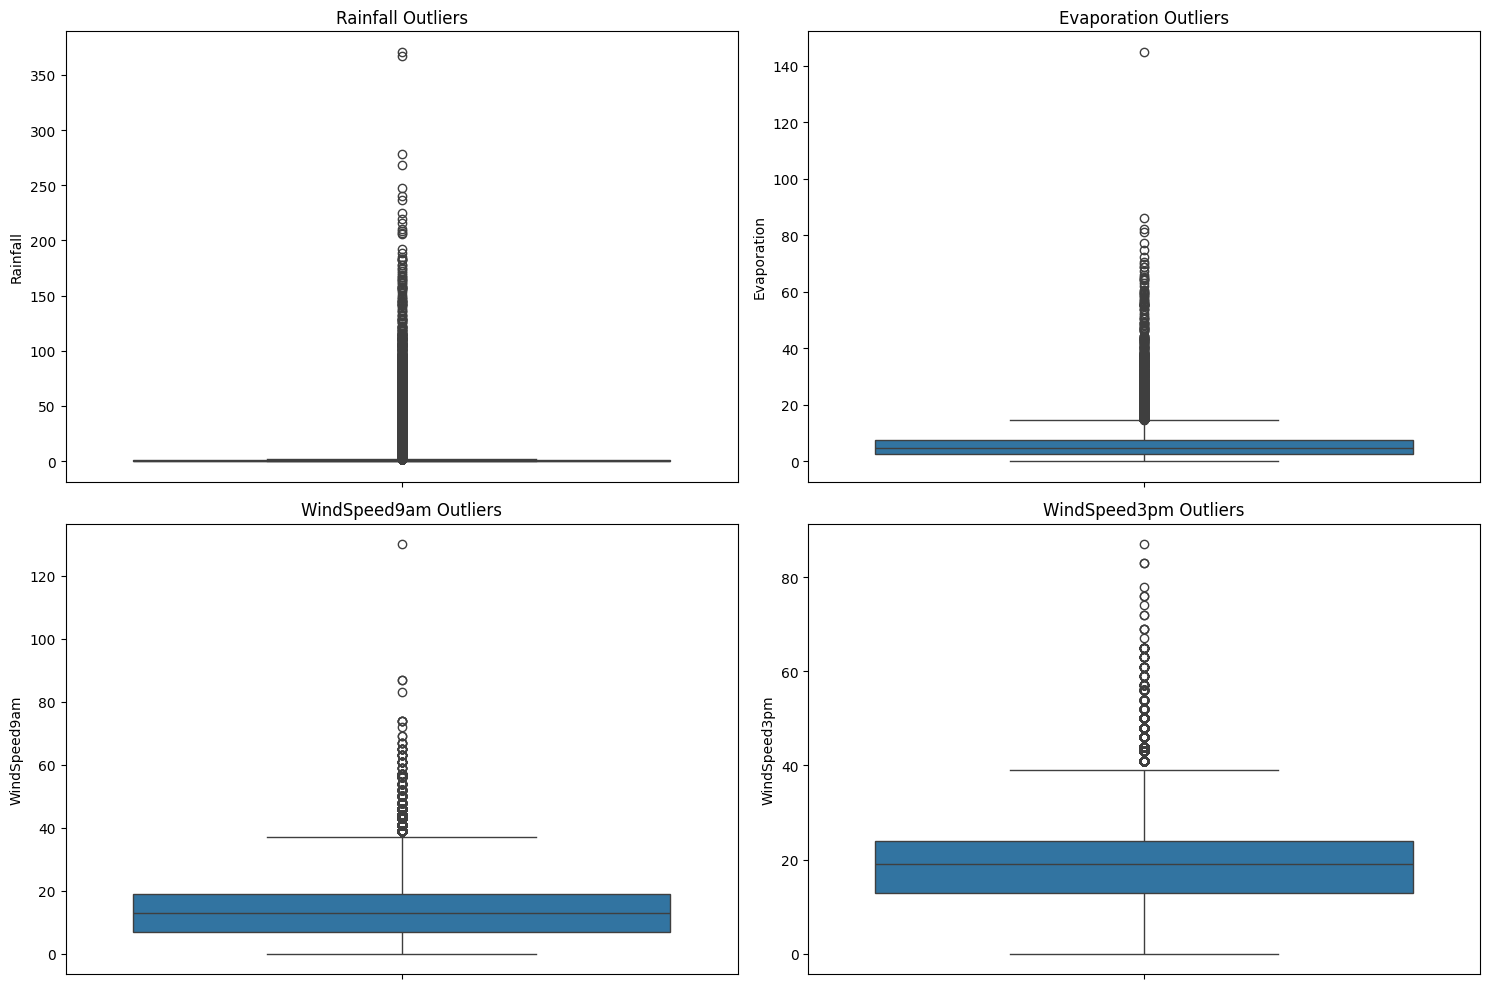

In [173]:
def plot_boxplots(columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(data=df, y=col)
        plt.title(f'{col} Outliers')
    plt.tight_layout()

plot_boxplots(['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm'])


## Verificando os outliers

In [174]:
def calculate_outliers(df, column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - (IQR * 3)
    upper_bound = df[column].quantile(0.75) + (IQR * 3)
    return lower_bound, upper_bound

for col in ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']:
    lower_bound, upper_bound = calculate_outliers(df, col)
    print(f'{col} outliers: valores < {lower_bound} ou > {upper_bound}')

Rainfall outliers: valores < -2.4000000000000004 ou > 3.2
Evaporation outliers: valores < -11.800000000000002 ou > 21.800000000000004
WindSpeed9am outliers: valores < -29.0 ou > 55.0
WindSpeed3pm outliers: valores < -20.0 ou > 57.0


Verificando RainToday e RainTomorrow

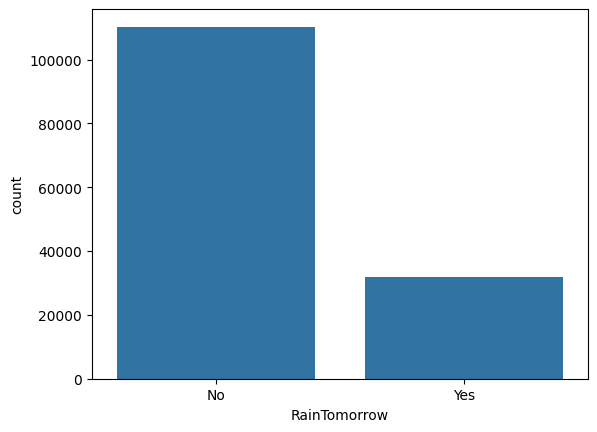

In [175]:
sns.countplot(x = 'RainTomorrow', data = df);

> Dataset desbalanceado

## Checando valorel null e duplicados

In [176]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [177]:
(df.isnull().sum()/len(df))*100

,0
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,43.166506
Sunshine,48.009762
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853


In [178]:
len(df[df.duplicated()])

0

## Mudando o formato de dados e criando ano, mês e dia

In [179]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01 00:00:00+00:00,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02 00:00:00+00:00,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03 00:00:00+00:00,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04 00:00:00+00:00,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05 00:00:00+00:00,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21 00:00:00+00:00,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22 00:00:00+00:00,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23 00:00:00+00:00,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24 00:00:00+00:00,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [180]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01 00:00:00+00:00,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02 00:00:00+00:00,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03 00:00:00+00:00,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04 00:00:00+00:00,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05 00:00:00+00:00,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21 00:00:00+00:00,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,2017-06-22 00:00:00+00:00,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,2017-06-23 00:00:00+00:00,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,2017-06-24 00:00:00+00:00,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


Agora podemos eliminar a coluna de Data que ficou redundante

In [181]:
df.drop('Date', axis=1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


## Vamos dividir as colunas em 2 tipos:
* Categóricas
* Numéricas

In [182]:
categorical_columns=df.select_dtypes(include="object").columns
numerical_columns=df.select_dtypes(exclude="object").columns

## Heat Map das colunas numéricas

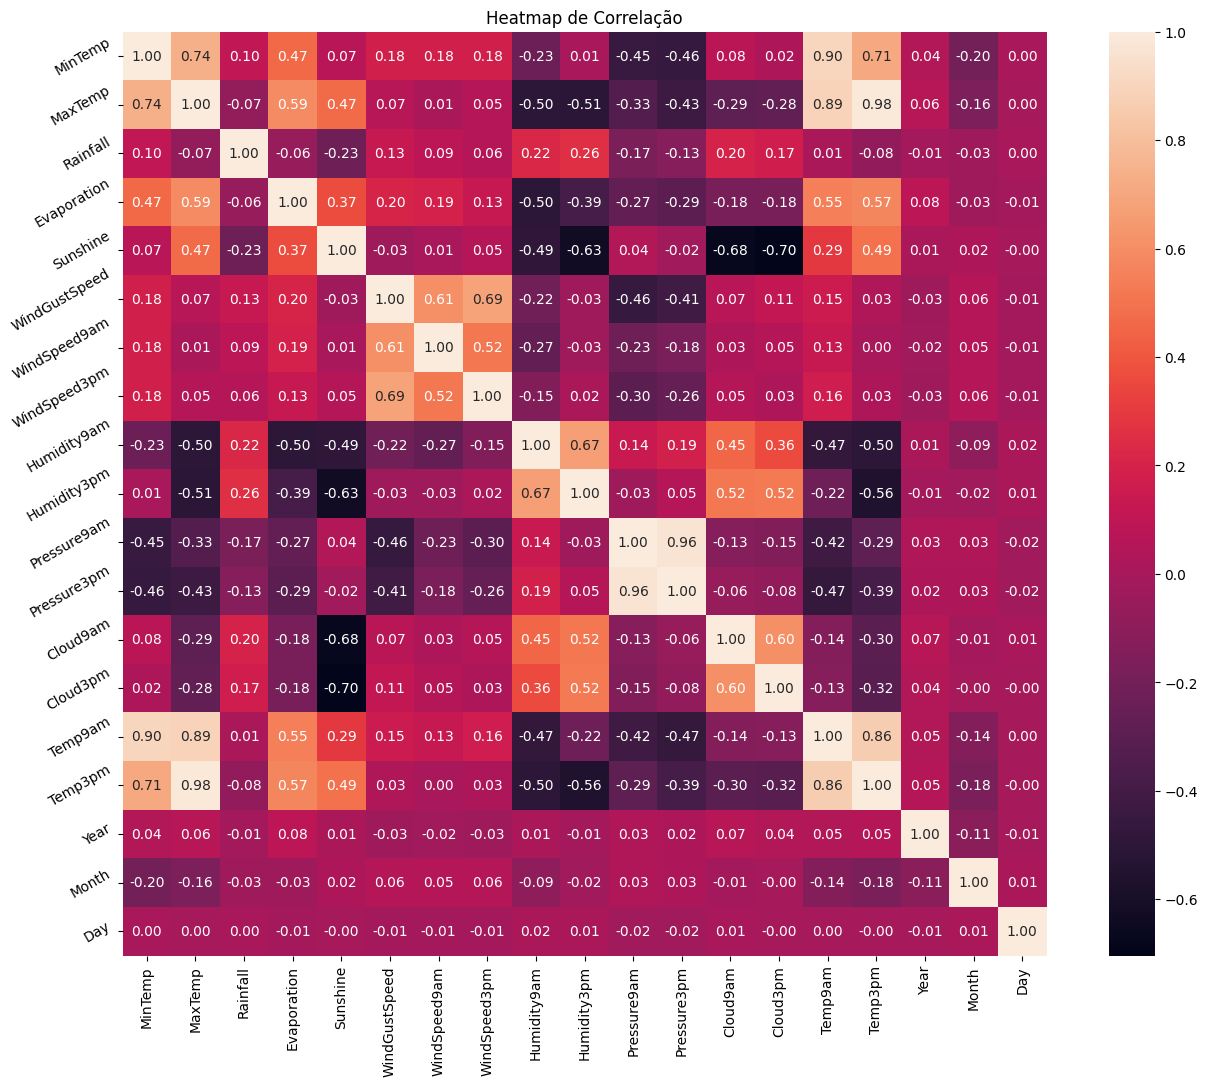

In [183]:
correlation = df[numerical_columns].corr()

plt.figure(figsize=(16,12))
plt.title('Heatmap de Correlação')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

## Explorando as colunas categóricas

In [184]:
categorical_columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [185]:
df[categorical_columns].isnull().sum()

,0
Location,0
WindGustDir,10326
WindDir9am,10566
WindDir3pm,4228
RainToday,3261
RainTomorrow,3267


Preenchendo dados faltantes para colunas categóricas utilizando a moda

In [186]:
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])



## Explorando colunas numéricas

In [187]:
numerical_columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')

In [188]:
df[numerical_columns].isnull().sum()

,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustSpeed,10263
WindSpeed9am,1767
WindSpeed3pm,3062
Humidity9am,2654
Humidity3pm,4507


Preenchendo dados faltantes para colunas numéricas utilizando a média

In [189]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

## Convertendo RainToday e RainTomorrow para 0 e 1 por conveniência

In [190]:
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)


<ipython-input-190-062454651978>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
<ipython-input-190-062454651978>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
<ipython-input

## Eliminado outliers no DataFrame usando o intervalo interquartil (IQR)

In [191]:
def remove_outliers(df, columns):
    for col in columns:
        lower_bound, upper_bound = calculate_outliers(df, col)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

print("Antes da remoção de outliers:", df.shape)

outlier_columns = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
df = remove_outliers(df, outlier_columns)

print("Depois da remoção de outliers:", df.shape)

Antes da remoção de outliers: (145460, 25)
Depois da remoção de outliers: (113114, 25)


## One Hot Encoding das variáveis categóricas

In [192]:
df_dummy = pd.get_dummies(data = df, columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_dummy.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,13.4,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,7.4,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,12.9,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,9.2,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,17.5,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


In [193]:
atributos = df_dummy.columns

X = df_dummy[atributos]
X = X.drop(['RainTomorrow'], axis=1)
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,13.4,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,7.4,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,12.9,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,9.2,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,17.5,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


In [194]:
y = df['RainTomorrow']
y.head()

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


## Separa em treino e teste

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79179, 117)
(79179,)
(33935, 117)
(33935,)


## Normalização

In [196]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(X_train))

# KNN

In [197]:
model = KNeighborsClassifier(n_neighbors=10)

model.fit(X_train, y_train)
pred_Knn = model.predict(X_test)


In [198]:
accuracy_knn = accuracy_score(y_test, pred_Knn)
f1_knn = f1_score(y_test, pred_Knn)

print("Model KNN:\n")
print("1. Accuracy: {:.2f}".format(accuracy_knn))
print("2. F1 Score: {:.2f}".format(f1_knn))

Model KNN:

1. Accuracy: 0.85
2. F1 Score: 0.43


# Naive Bayes

In [199]:
model = GaussianNB()

model.fit(X_train, y_train)
pred_nb = model.predict(X_test)

In [200]:
accuracy_nb = accuracy_score(y_test, pred_nb)
f1_nb = f1_score(y_test, pred_nb)

print("Model Naive Bayes:\n")
print("1. Accuracy: {:.2f}".format(accuracy_nb))
print("2. F1 Score: {:.2f}".format(f1_nb))

Model Naive Bayes:

1. Accuracy: 0.62
2. F1 Score: 0.39


## Rede Neural

## Construção da Rede Neural

In [201]:
model = keras.Sequential([
    normalizer,
    layers.Dense(10, activation='tanh'),

    layers.Dense(5, activation='tanh'),

    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization)      │ (79179, 117)                │             235 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235 (944.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 235 (944.00 B)

## Treinar o modelo

In [202]:
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

Epoch 1/20
6335/6335 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8195 - loss: 0.4031 - val_accuracy: 0.8605 - val_loss: 0.3365
Epoch 2/20
6335/6335 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8587 - loss: 0.3371 - val_accuracy: 0.8624 - val_loss: 0.3318
Epoch 3/20
6335/6335 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8631 - loss: 0.3278 - val_accuracy: 0.8644 - val_loss: 0.3261
Epoch 4/20
6335/6335 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8637 - loss: 0.3239 - val_accuracy: 0.8649 - val_loss: 0.3261
Epoch 5/20
6335/6335 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8660 - loss: 0.3196 - val_accuracy: 0.8675 - val_loss: 0.3235
Epoch 6/20
6335/6335 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8671 - loss: 0.3200 - val_accuracy: 0.8631 - val_loss: 0.3276
Epoch 7/20
6335/6335 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8689 - loss: 0.3137 - val_accuracy: 0.8651 - val_loss: 0.3241
Epoch 8/20
6335/6335 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8687 - loss: 0

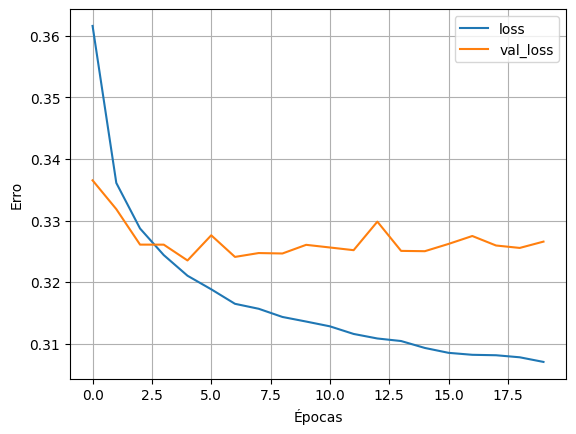

In [203]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)

plot_loss(history)


## Avalia o modelo no conjunto de teste

In [204]:
pred_nn = (model.predict(X_test) > 0.5).astype("int32")

1061/1061 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [205]:
accuracy_nn = accuracy_score(y_test, pred_nn)
f1_nn = f1_score(y_test, pred_nn)
print("\nModel Neural Network:\n")
print("1. Accuracy: {:.2f}".format(accuracy_nn))
print("2. F1 Score: {:.2f}".format(f1_nn))


Model Neural Network:

1. Accuracy: 0.86
2. F1 Score: 0.54



## Previsões

In [206]:
print("\nComparação Final:\n")
print(f"Acurácia KNN: {accuracy_knn:.2f}, F1 Score: {f1_knn:.2f}")
print(f"Acurácia Naive Bayes: {accuracy_nb:.2f}, F1 Score: {f1_nb:.2f}")
print(f"Acurácia Neural Network: {accuracy_nn:.2f}, F1 Score: {f1_nn:.2f}")


Comparação Final:

Acurácia KNN: 0.85, F1 Score: 0.43
Acurácia Naive Bayes: 0.62, F1 Score: 0.39
Acurácia Neural Network: 0.86, F1 Score: 0.54
